In [59]:
#initialising the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# load the dataset from scikit-learn
dataset=load_digits()
x=dataset.data
y=dataset.target


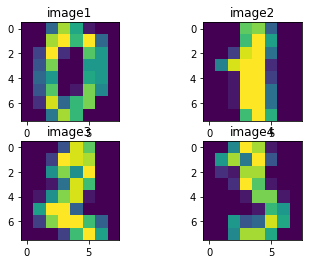

In [4]:
## visualising the handwritten digits
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(np.reshape(x[i],(8,8)))
    plt.title(f'image{i+1}')

In [5]:
# normalising the pixel values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((0,1))
x_scaled=scaler.fit_transform(x)

In [6]:
#t-distributed stochastic neighbor embedding (t-SNE) is uded to reduce the dimensions
from sklearn.manifold import TSNE
model=TSNE(n_components=16,random_state=0,n_iter=5000,method='exact')
tsne_data=model.fit_transform(x_scaled)

c:\users\debu\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\debu\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [7]:
# normalising the t-SNE based features
x_tsne_scaled=scaler.fit_transform(tsne_data)

In [8]:
# 1000 images taken for training and 300 images taken for testing
x_train=x_tsne_scaled[0:1000]
x_test=x_tsne_scaled[1000:1300]

In [9]:
y_train=y[0:1000]
y_test=y[1000:1300]

# Random Forest Classifier using 5 Cross-validation


In [42]:
clf1=GridSearchCV(RandomForestClassifier(),{
    'n_estimators':[30,40,100,200],
    'max_depth':[2,4],
    
    
    },cv=5,return_train_score=False)
clf1.fit(x_train,y_train)
result1=pd.DataFrame(clf1.cv_results_)
result1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089813,0.016740,0.003124,0.006248,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.740,0.880,0.735,0.800,0.780,0.787,0.052498,8
1,0.116682,0.011312,0.010642,0.004091,2,40,"{'max_depth': 2, 'n_estimators': 40}",0.810,0.890,0.810,0.800,0.735,0.809,0.049234,7
2,0.279890,0.013336,0.015893,0.000528,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.780,0.890,0.820,0.840,0.810,0.828,0.036551,6
3,0.573694,0.033515,0.040043,0.008524,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.795,0.915,0.815,0.830,0.800,0.831,0.043749,5
4,0.099341,0.004586,0.009639,0.007426,4,30,"{'max_depth': 4, 'n_estimators': 30}",0.855,0.955,0.880,0.880,0.875,0.889,0.034264,4
5,0.124966,0.000013,0.006249,0.007653,4,40,"{'max_depth': 4, 'n_estimators': 40}",0.880,0.955,0.905,0.905,0.890,0.907,0.025807,3
6,0.331763,0.022908,0.015622,0.000018,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.895,0.955,0.910,0.940,0.880,0.916,0.027821,1
7,0.691913,0.019442,0.036359,0.006519,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.890,0.955,0.915,0.905,0.885,0.910,0.024900,2


In [43]:
prediction_RF=clf1.predict(x_test)
print("testing_accuracy: %.2f%%" % (clf1.score(x_test,y_test)*100))

testing_accuracy: 96.00%


In [44]:
print(classification_report(y_test,prediction_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.93      0.97        30
           2       1.00      0.97      0.98        29
           3       0.93      0.96      0.95        28
           4       1.00      1.00      1.00        32
           5       0.91      0.94      0.92        31
           6       1.00      1.00      1.00        29
           7       0.88      1.00      0.94        30
           8       1.00      0.87      0.93        30
           9       0.91      0.94      0.92        31

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



Text(0.5, 1.0, 'Confusion Matrix')

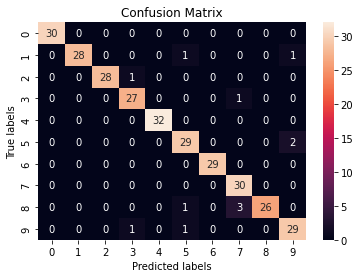

In [45]:
## Confusion Matrix using Random Forest
cm1=confusion_matrix(y_test,prediction_RF)
ax=plt.subplot()
sns.heatmap(cm1,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

# SVM Classifier using 5 cross-validation


In [46]:
clf2=GridSearchCV(SVC(gamma='auto',probability=True),{
    'C':[1,5,10,15],
    'kernel':['rbf','poly','linear']
    },cv=5,return_train_score=False)
clf2.fit(x_train,y_train)
result2=pd.DataFrame(clf2.cv_results_)
result2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.272426,0.016516,0.027652,0.006070,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.870,0.965,0.870,0.900,0.880,0.897,0.035721,10
1,0.295574,0.011262,0.010442,0.005713,1,poly,"{'C': 1, 'kernel': 'poly'}",0.495,0.450,0.395,0.420,0.345,0.421,0.050537,12
2,0.065616,0.006244,0.009367,0.007648,1,linear,"{'C': 1, 'kernel': 'linear'}",0.925,0.985,0.970,0.975,0.920,0.955,0.027019,6
3,0.144741,0.011658,0.017500,0.003745,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.925,0.985,0.940,0.960,0.910,0.944,0.026344,7
4,0.200886,0.009859,0.013510,0.004220,5,poly,"{'C': 5, 'kernel': 'poly'}",0.885,0.955,0.855,0.840,0.875,0.882,0.039699,11
5,0.053113,0.007652,0.000000,0.000000,5,linear,"{'C': 5, 'kernel': 'linear'}",0.935,0.980,0.980,0.985,0.950,0.966,0.019849,3
6,0.106568,0.009223,0.015619,0.000360,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.930,0.975,0.975,0.975,0.925,0.956,0.023324,5
7,0.155922,0.005954,0.012552,0.003019,10,poly,"{'C': 10, 'kernel': 'poly'}",0.870,0.965,0.915,0.895,0.885,0.906,0.032924,9
8,0.054566,0.009708,0.000417,0.000834,10,linear,"{'C': 10, 'kernel': 'linear'}",0.940,0.980,0.965,0.985,0.960,0.966,0.015937,3
9,0.092778,0.009000,0.012170,0.006118,15,rbf,"{'C': 15, 'kernel': 'rbf'}",0.930,0.980,0.985,0.980,0.965,0.968,0.020149,2


In [47]:
prediction_SF=clf2.predict(x_test)
print("testing_accuracy: %.2f%%" % (clf2.score(x_test,y_test)*100))

testing_accuracy: 98.67%


In [48]:
print(classification_report(y_test,prediction_SF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00        29
           3       0.97      1.00      0.98        28
           4       1.00      1.00      1.00        32
           5       0.97      1.00      0.98        31
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       1.00      0.90      0.95        31

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Text(0.5, 1.0, 'Confusion Matrix')

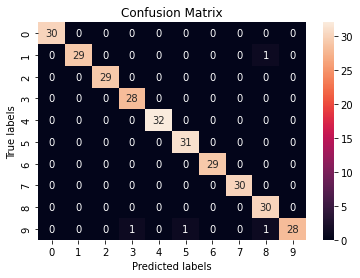

In [49]:
## Confusion Matrix using SVM
cm2=confusion_matrix(y_test,prediction_SF)
ax=plt.subplot()
sns.heatmap(cm2,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

# classification using KNN

In [50]:
clf3=GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors':[2,3,4,5,6,7],
    'weights':['distance','uniform']
    
    },cv=5,return_train_score=False)
    
clf3.fit(x_train,y_train)
result3=pd.DataFrame(clf3.cv_results_)
result3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001121,0.000697,0.009326,2.503567e-03,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.945,0.955,0.965,0.990,0.970,0.965,0.015166,2
1,0.000199,0.000399,0.019475,6.048996e-03,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.895,0.950,0.990,0.980,0.960,0.955,0.033166,7
2,0.000000,0.000000,0.006255,7.660267e-03,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.940,0.965,0.985,0.975,0.970,0.967,0.015033,1
3,0.000000,0.000000,0.015620,3.581044e-06,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.930,0.965,0.980,0.975,0.960,0.962,0.017493,4
4,0.000000,0.000000,0.006243,7.646200e-03,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.925,0.960,0.985,0.975,0.970,0.963,0.020640,3
5,0.000000,0.000000,0.015627,1.060102e-05,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.905,0.960,0.985,0.930,0.960,0.948,0.027677,9
6,0.000000,0.000000,0.006246,7.649751e-03,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.920,0.955,0.985,0.975,0.970,0.961,0.022672,5
7,0.000000,0.000000,0.015622,8.869684e-07,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.900,0.950,0.975,0.925,0.960,0.942,0.026571,11
8,0.000000,0.000000,0.009379,7.657776e-03,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",0.915,0.955,0.985,0.955,0.970,0.956,0.023324,6
9,0.001652,0.003304,0.015037,1.170354e-03,6,uniform,"{'n_neighbors': 6, 'weights': 'uniform'}",0.880,0.955,0.990,0.935,0.955,0.943,0.036139,10


In [51]:
prediction_knn=clf3.predict(x_test)
print("testing_accuracy: %.2f%%" % (clf3.score(x_test,y_test)*100))

testing_accuracy: 97.67%


In [52]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00        29
           3       0.97      1.00      0.98        28
           4       0.97      1.00      0.98        32
           5       0.89      1.00      0.94        31
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        30
           8       0.97      1.00      0.98        30
           9       1.00      0.81      0.89        31

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Text(0.5, 1.0, 'Confusion Matrix')

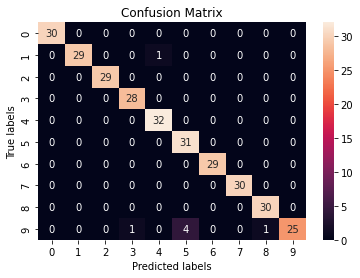

In [53]:
cm3=confusion_matrix(y_test,prediction_knn)
ax=plt.subplot()
sns.heatmap(cm3,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

# Logistic Regression classifier using 5 cross-validation

In [55]:
clf4=GridSearchCV(LogisticRegression(),{
    'penalty':['l2','none'],
    
    
    },cv=5,return_train_score=False)
    
clf4.fit(x_train,y_train)
result2=pd.DataFrame(clf4.cv_results_)
result2

c:\users\debu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\debu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.112720,0.021201,0.0,0.0,l2,{'penalty': 'l2'},0.870,0.96,0.880,0.915,0.88,0.901,0.033226,2
1,0.114825,0.026882,0.0,0.0,none,{'penalty': 'none'},0.975,0.98,0.915,0.955,0.96,0.957,0.022935,1


In [56]:
prediction_knn=clf4.predict(x_test)
print("testing_accuracy: %.2f%%" % (clf4.score(x_test,y_test)*100))

testing_accuracy: 95.67%


In [57]:
print(classification_report(y_test,prediction_LF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      0.93      0.95        30
           2       0.94      1.00      0.97        29
           3       0.96      0.96      0.96        28
           4       1.00      1.00      1.00        32
           5       0.97      1.00      0.98        31
           6       1.00      1.00      1.00        29
           7       0.97      1.00      0.98        30
           8       0.97      0.97      0.97        30
           9       1.00      0.90      0.95        31

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Text(0.5, 1.0, 'Confusion Matrix')

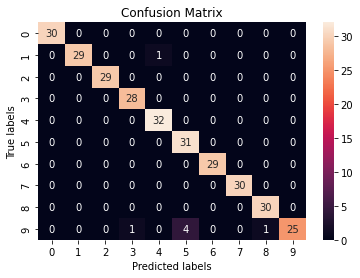

In [58]:
cm4=confusion_matrix(y_test,prediction_LF)
ax=plt.subplot()
sns.heatmap(cm3,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

# Save the Model for Deployment. SVM model is saved, as it is given highest accuracy  

In [61]:
pickle.dump(clf2,open('SVM_model.pkl','wb'))

In [62]:
load_model=pickle.load(open('SVM_model.pkl','rb'))

In [63]:
print("testing_accuracy: %.2f%%" % (load_model.score(x_test,y_test)*100))

0.9866666666666667

In [7]:
import pandas as pd
pd.DataFrame(x_train).to_excel('tsne_train_data.xlsx',header=None)
pd.DataFrame(x_test).to_excel('tsne_test_data.xlsx',header=None)